In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
print(response.status_code)  # Should now be 200

soup = BeautifulSoup(response.text, "html.parser")
print(soup.title.text if soup.title else "No title found")


200
List of countries and dependencies by population (United Nations) - Wikipedia


In [4]:
table = soup.find("table", class_="wikitable")
rows = table.find_all("tr")

print(len(rows))

239


In [8]:
data = []

for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) >= 2:
        country = cols[0].text.strip()
        population = cols[1].text.strip()
        data.append([country, population])

df = pd.DataFrame(data, columns=["Country", "Population"])
df.head()


,Country,Population
0,World,"8,021,407,192"
1,India,"1,425,423,212"
2,China[a],"1,425,179,569"
3,United States,"341,534,046"
4,Indonesia,"278,830,529"


In [9]:
df["Population"] = (
    df["Population"]
    .str.replace(",", "")
    .str.replace(r"\[.*\]", "", regex=True)
    .astype(int)
)

In [10]:
df.describe()

,Population
count,2.380000e+02
mean,6.740799e+07
std,5.353495e+08
min,5.050000e+02
25%,3.988368e+05
50%,5.465499e+06
75%,2.275348e+07
max,8.021407e+09


In [11]:
df.sort_values("Population", ascending=False).head(10)

,Country,Population
0,World,8021407192
1,India,1425423212
2,China[a],1425179569
3,United States,341534046
4,Indonesia,278830529
5,Pakistan,243700667
6,Nigeria,223150896
7,Brazil,210306415
8,Bangladesh,169384897
9,Russia,145579899


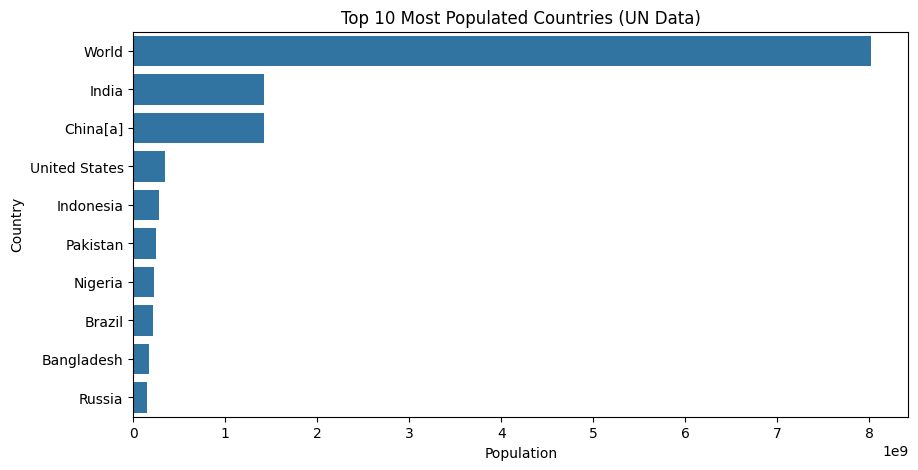

In [12]:
top10 = df.sort_values("Population", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x="Population", y="Country", data=top10)
plt.title("Top 10 Most Populated Countries (UN Data)")
plt.show()

In [13]:
df.to_csv("population_data.csv", index=False)